In [1]:
%load_ext jupyter_ai

In [4]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `ai21:j1-large`, `ai21:j1-grande`, `ai21:j1-jumbo`, `ai21:j1-grande-instruct`, `ai21:j2-large`, `ai21:j2-grande`, `ai21:j2-jumbo`, `ai21:j2-grande-instruct`, `ai21:j2-jumbo-instruct` |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock:amazon.titan-tg1-large`, `bedrock:anthropic.claude-v1`, `bedrock:anthropic.claude-instant-v1`, `bedrock:ai21.j2-jumbo-instruct`, `bedrock:ai21.j2-grande-instruct` |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic:claude-v1`, `anthropic:claude-v1.0`, `anthropic:claude-v1.2`, `anthropic:claude-instant-v1`, `anthropic:claude-instant-v1.0` |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `cohere:medium`, `cohere:xlarge` |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See https://huggingface.co/models for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai-chat:gpt-4`, `openai-chat:gpt-4-0314`, `openai-chat:gpt-4-32k`, `openai-chat:gpt-4-32k-0314`, `openai-chat:gpt-3.5-turbo`, `openai-chat:gpt-3.5-turbo-0301` |
| `openai-chat-new` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai-chat-new:gpt-4`, `openai-chat-new:gpt-4-0314`, `openai-chat-new:gpt-4-32k`, `openai-chat-new:gpt-4-32k-0314`, `openai-chat-new:gpt-3.5-turbo`, `openai-chat-new:gpt-3.5-turbo-0301` |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must include the `--region_name`, `--request_schema`, and the `--response_path` arguments. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:text-davinci-003` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |


In [17]:
from getpass import getpass

API_KEY = getpass("Trello API Key")
TOKEN = getpass("Trello Token")

Trello API Key ········
Trello Token ········


In [217]:
import requests
import json

BOARD_ID = 'pfDnwT4D'

def api_call(endpoint, additional_params):
    params = {
        'key': API_KEY,
        'token': TOKEN,
        'limit': 1000,
    }
    params.update(additional_params)
    
    response = requests.get(
            f"https://api.trello.com/1{endpoint}",
            headers={ "Accept": "application/json" },
            params=params
    )

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Request failed with status code {response.status_code}")
            
def get_cards(board_id):
    return api_call(f"/boards/{board_id}/cards", { 'filter': 'all' })
        
cards = get_cards(BOARD_ID)

print(f"Downloaded cards: {len(cards)}")

Downloaded cards: 228


In [218]:
def get_actions(card_id):
    return api_call(f"/cards/{card_id}/actions", { "filter": "updateCard:idList,copyCard,createCard,convertToCardFromCheckItem", })

for card in cards:
    card["actions"] = list(reversed(get_actions(card["id"])))

In [219]:
import json

def prettyprint(obj):
    print(json.dumps(obj, indent=2))

prettyprint(cards[200])

{
  "id": "63d8d22247ae964a4143cc2e",
  "badges": {
    "attachmentsByType": {
      "trello": {
        "board": 0,
        "card": 0
      }
    },
    "location": false,
    "votes": 0,
    "viewingMemberVoted": false,
    "subscribed": false,
    "fogbugz": "",
    "checkItems": 0,
    "checkItemsChecked": 0,
    "checkItemsEarliestDue": null,
    "comments": 0,
    "attachments": 0,
    "description": true,
    "due": "2023-02-01T08:13:00.000Z",
    "dueComplete": false,
    "start": null
  },
  "checkItemStates": [],
  "closed": true,
  "dueComplete": false,
  "dateLastActivity": "2023-04-03T09:18:24.120Z",
  "desc": "\n\n\u2506Card is synchronized with this [Asana task](https://app.asana.com/0/1203814688552156/1204021363478535) by [Unito](https://www.unito.io)\n",
  "descData": {
    "emoji": {}
  },
  "due": "2023-02-01T08:13:00.000Z",
  "dueReminder": 1440,
  "email": null,
  "idBoard": "6374b6c8d908a5001de2fa73",
  "idChecklists": [],
  "idList": "6374b72bcbb33c0681d4b99b",
 

In [37]:
def get_lists(board_id):
    return api_call(f"/boards/{board_id}/lists", {})

lists = get_lists(BOARD_ID)

In [38]:
prettyprint(lists[0])

{
  "id": "63bc34d346143f025ffe3152",
  "name": "Backlog",
  "closed": false,
  "idBoard": "6374b6c8d908a5001de2fa73",
  "pos": 8192,
  "subscribed": false,
  "softLimit": null,
  "status": null
}


In [39]:
list_id2list_name = dict((l["id"], l["name"]) for l in lists)
list_id2list_name

{'63bc34d346143f025ffe3152': 'Backlog',
 '6374b6c8d908a5001de2fa7b': 'Priorisierung',
 '6374b6c8d908a5001de2fa7c': 'Entwicklung',
 '6374b70b76ae9a0265bb679b': 'Feedback / Blocked',
 '6374b723ad21d7062366f9b6': 'Testen',
 '641838c6ee62b9f7a7fa8ac2': 'Erledigt (aber noch nicht veröffentlicht)',
 '6374b72bcbb33c0681d4b99b': 'Veröffentlicht (kann genutzt werden)'}

In [41]:
list_name2list_id = dict((l["name"], l["id"]) for l in lists)
list_name2list_id

{'Backlog': '63bc34d346143f025ffe3152',
 'Priorisierung': '6374b6c8d908a5001de2fa7b',
 'Entwicklung': '6374b6c8d908a5001de2fa7c',
 'Feedback / Blocked': '6374b70b76ae9a0265bb679b',
 'Testen': '6374b723ad21d7062366f9b6',
 'Erledigt (aber noch nicht veröffentlicht)': '641838c6ee62b9f7a7fa8ac2',
 'Veröffentlicht (kann genutzt werden)': '6374b72bcbb33c0681d4b99b'}

# Datenvalidierung

In [227]:
def is_move_action(action):
    return "listBefore" in action["data"] and "listAfter" in action["data"]

for card in cards:
    card["actions"] = [action for (index, action) in enumerate(card["actions"]) if (action["type"] != "updateCard" and index == 0) or is_move_action(action)]

In [228]:
def is_valid_card(card):
    return len(card["actions"]) > 0 and is_first_action_copy_or_create(card) and is_tail_of_actions_move_actions(card)

def is_first_action_copy_or_create(card):
    return card["actions"][0]["type"] in ["createCard", "copyCard", "convertToCardFromCheckItem"]

def is_tail_of_actions_move_actions(card):
    return all(is_move_action(action) for action in card["actions"][1:])

valid_cards = [card for card in cards if is_valid_card(card)]
invalid_cards = [card for card in cards if not is_valid_card(card)]

print(f"Invalid cards: {len(invalid_cards)}")

for card in invalid_cards:
    print(card["name"])
    prettyprint(card["actions"])

Invalid cards: 0


# Velocity im Trello-Board (Anzahl fertiger Karten pro Monat)

In [91]:
def get_last_move_date(card):
    dates = [a["date"] for a in card["actions"] if is_move_action(a) or a["type"] in ["createCard", "copyCard"]]
             
    return max(dates)

get_last_move_date(cards[200])

'2023-02-13T07:55:33.477Z'

In [83]:
finished_cards = [card for card in cards if card["idList"] == list_name2list_id["Veröffentlicht (kann genutzt werden)"]]

print(f"Finished cards: {len(finished_cards)}")

Finished cards: 77


# Abgeschlossene Karten pro Monat

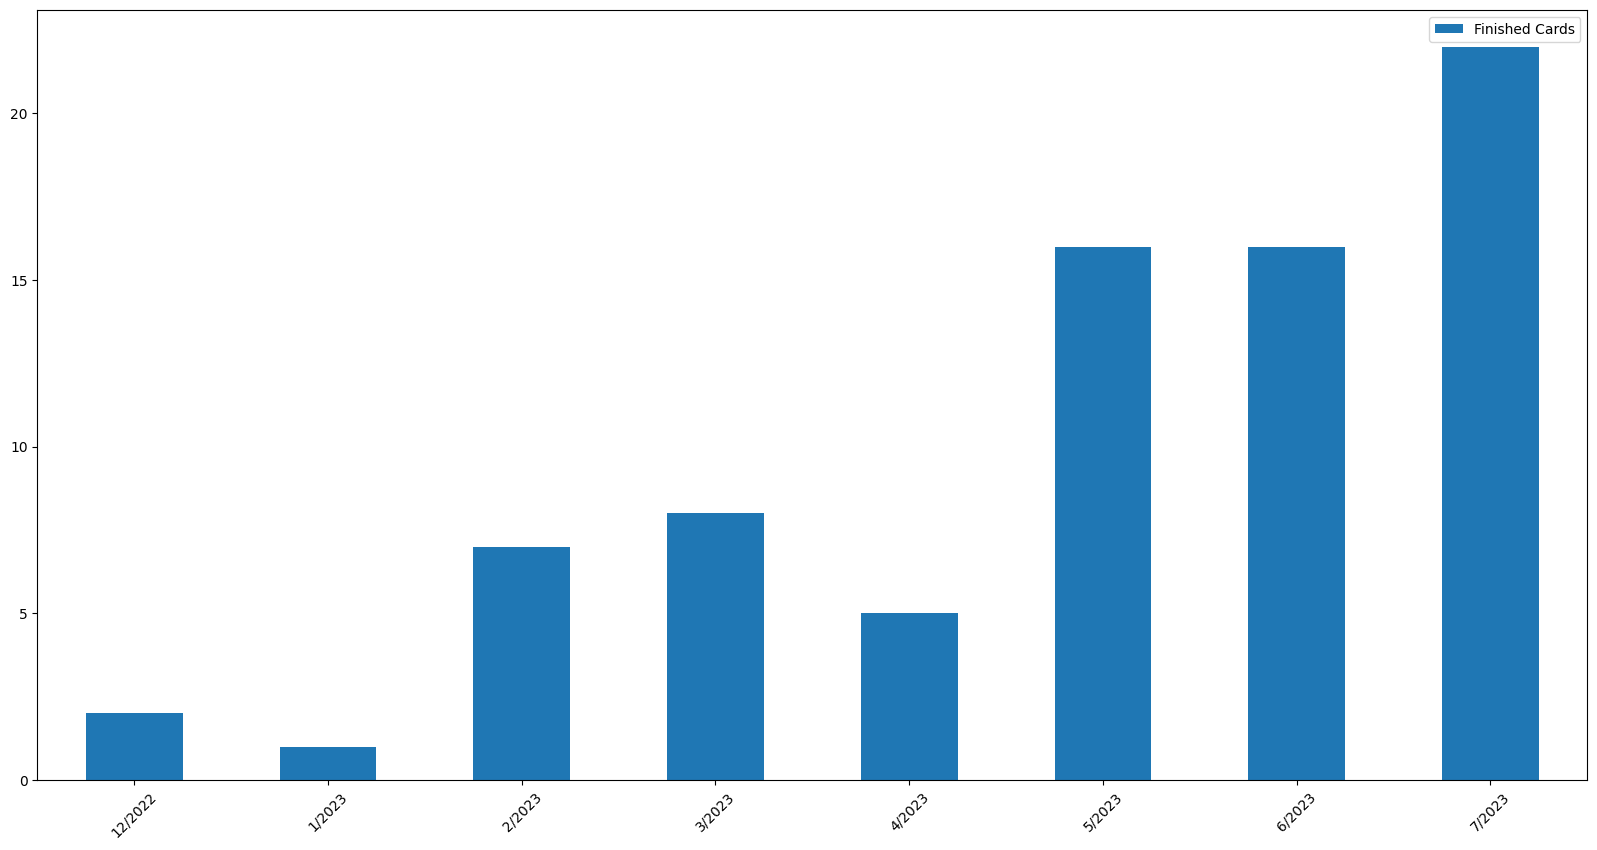

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

def plot(resample_time="1M", score_per_card= lambda x: 1):
    data = dict((get_last_move_date(card), score_per_card(card)) for card in finished_cards)
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Finished Cards'])
    df.index = pd.to_datetime(df.index)
    df.head()
    
    df = df.resample(resample_time).sum()
    df.plot(figsize=(20,10), kind="bar")
    
    plt.xticks(range(len(df.index)), [f"{d.month}/{d.year}" for d in df.index], rotation=45)
    
plot(resample_time="1M")

# Abgeschlossene Karten pro 2 Monate

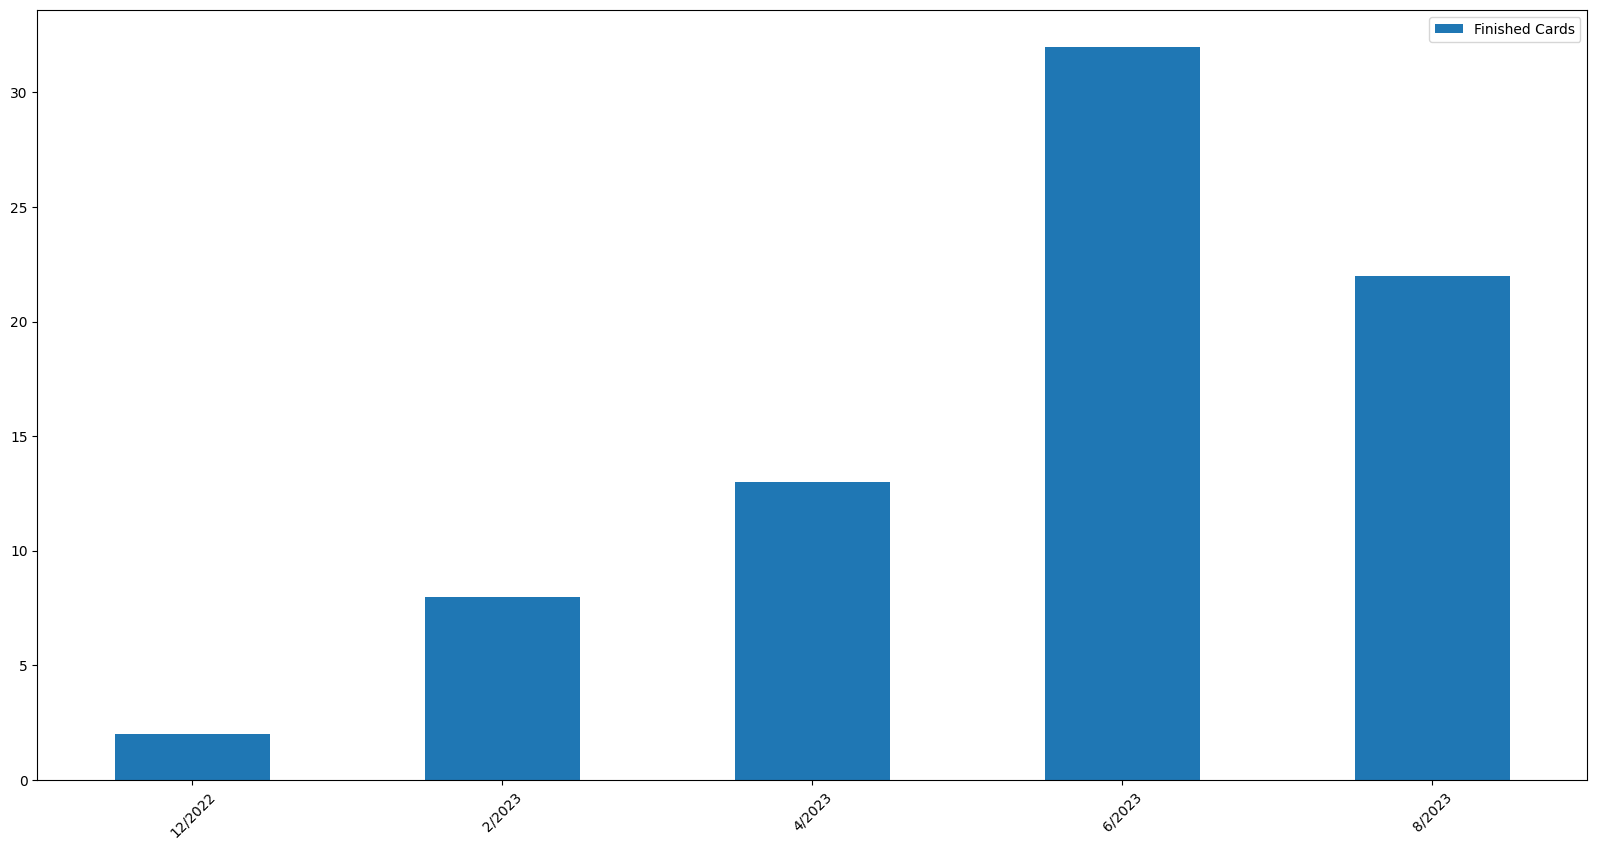

In [137]:
plot(resample_time="2M")

# Rolling Mean: 1 Monat

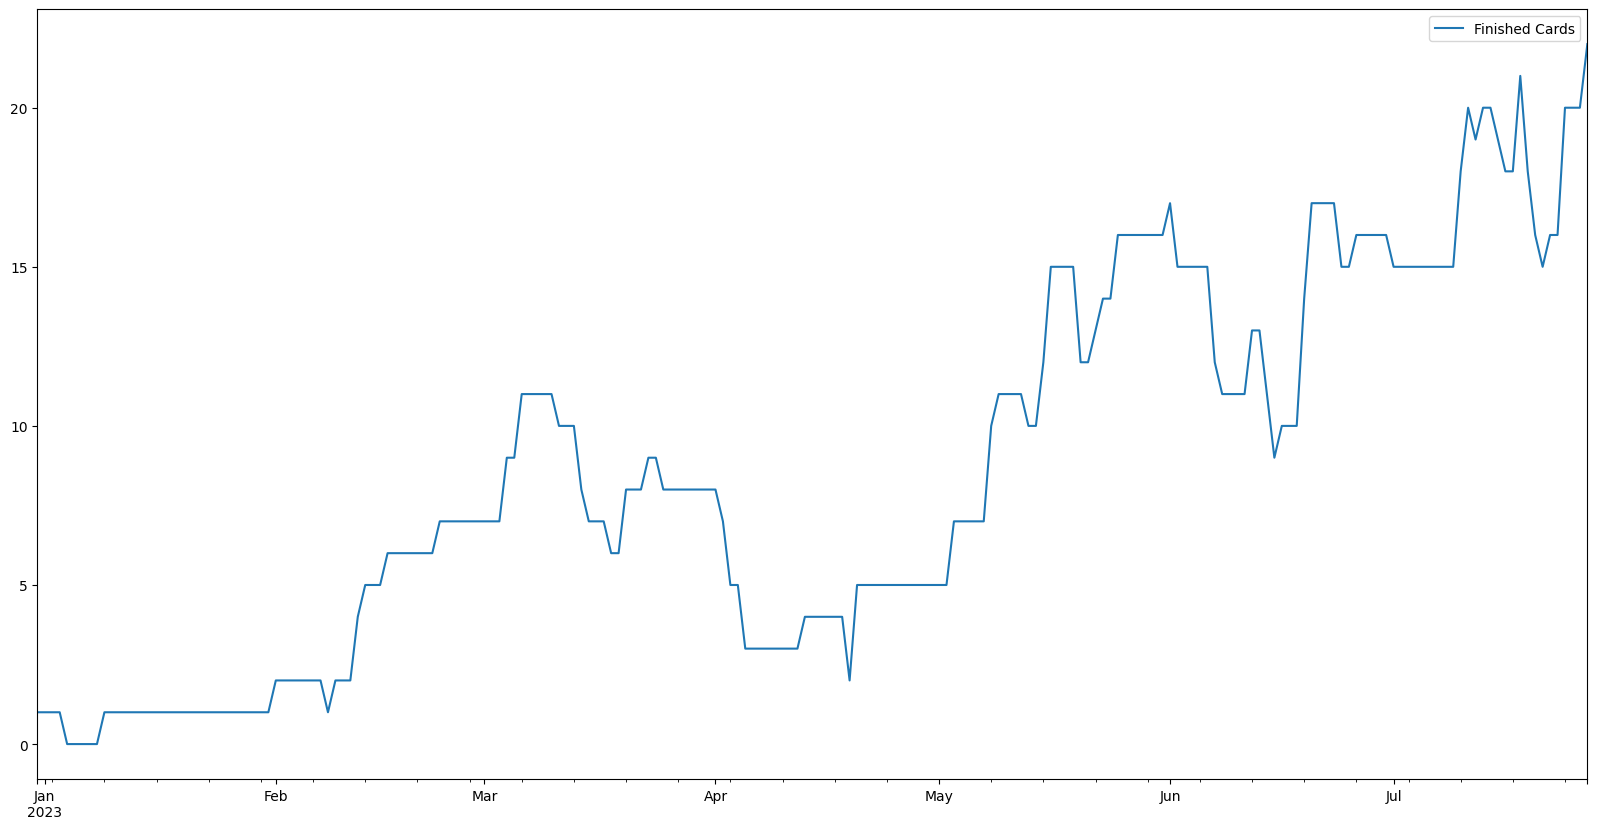

In [138]:
def plot_rolling(days=30, score_per_card= lambda x: 1):
    data = dict((get_last_move_date(card), score_per_card(card)) for card in finished_cards)
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Finished Cards'])
    df.index = pd.to_datetime(df.index)
    df.head()
    
    df = df.resample("1D").sum().rolling(window=days, min_periods=days).sum()
    df = df[days:]
    df.plot(figsize=(20,10))

plot_rolling()

# Rolling mean: 90 Tage

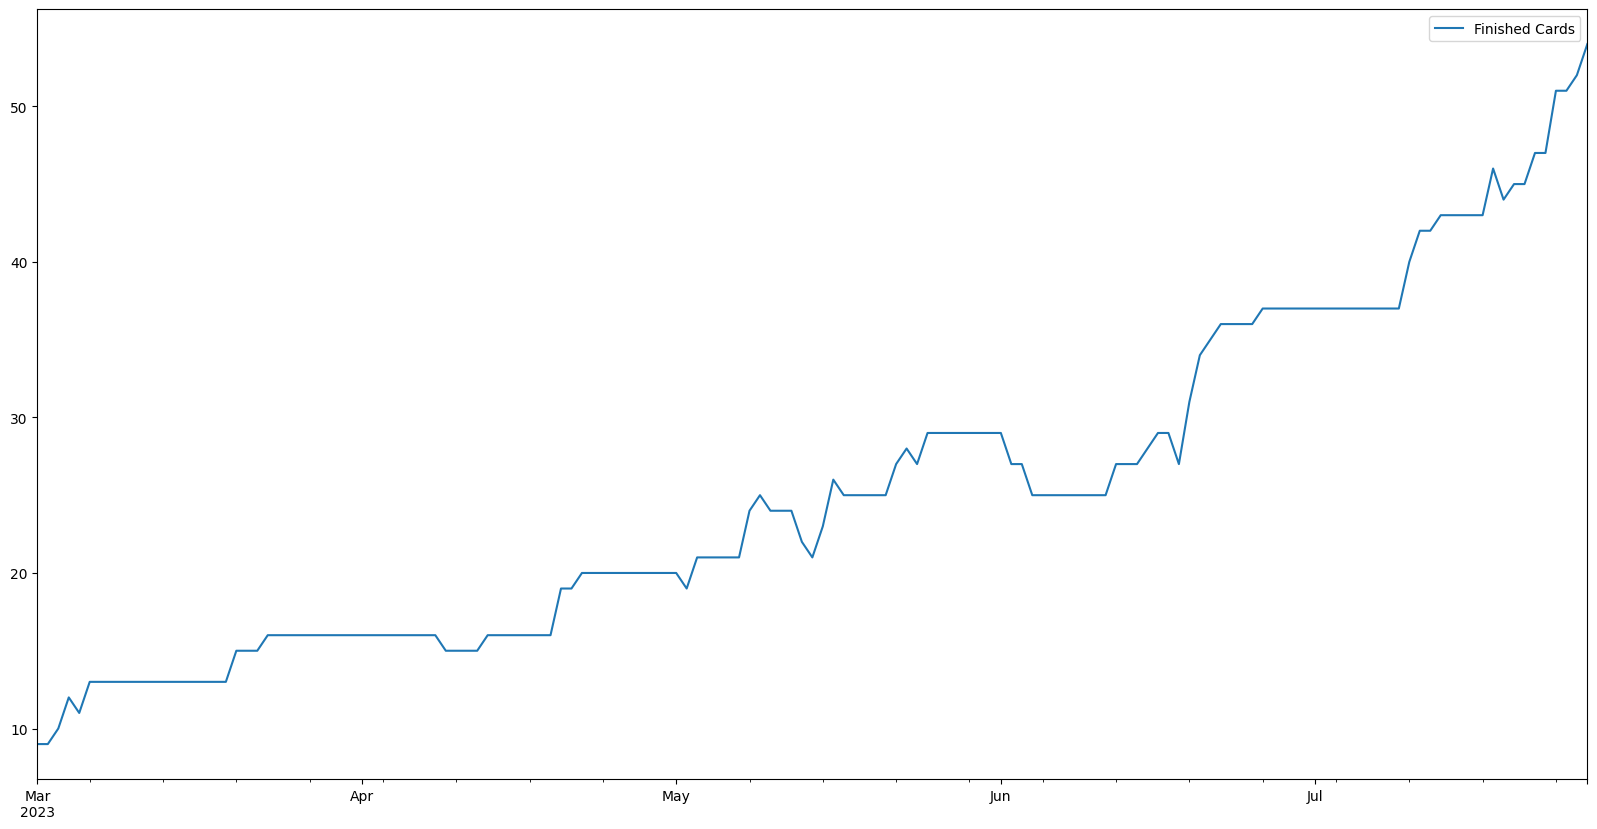

In [139]:
def plot_rolling(days=30, score_per_card= lambda x: 1):
    data = dict((get_last_move_date(card), score_per_card(card)) for card in finished_cards)
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Finished Cards'])
    df.index = pd.to_datetime(df.index)
    df.head()
    
    df = df.resample("1D").sum().rolling(window=days, min_periods=days).sum()
    df = df[days:]
    df.plot(figsize=(20,10))

plot_rolling(days=90)

# Statistics mit Score (1 Point = 1 estimated day of work)

* Mini-Feature = 1
* S-Size = 4
* M = 21
* L = 60

In [151]:
def get_score(card, default=None):
    for label in card["labels"]:
        if label["name"] == "Mini-Feature":
            return 1
        elif label["name"] == "S":
            return 4
        elif label["name"] == "M":
            return 14
        elif label["name"] == "L":
            return 30
    return default

all_scores = [get_score(card) for card in cards]
actual_scores = [s for s in all_scores if s != None]
mean_score = sum(actual_scores) / len(actual_scores)

print(f"Mean score: {mean_score}")

Mean score: 9.898550724637682


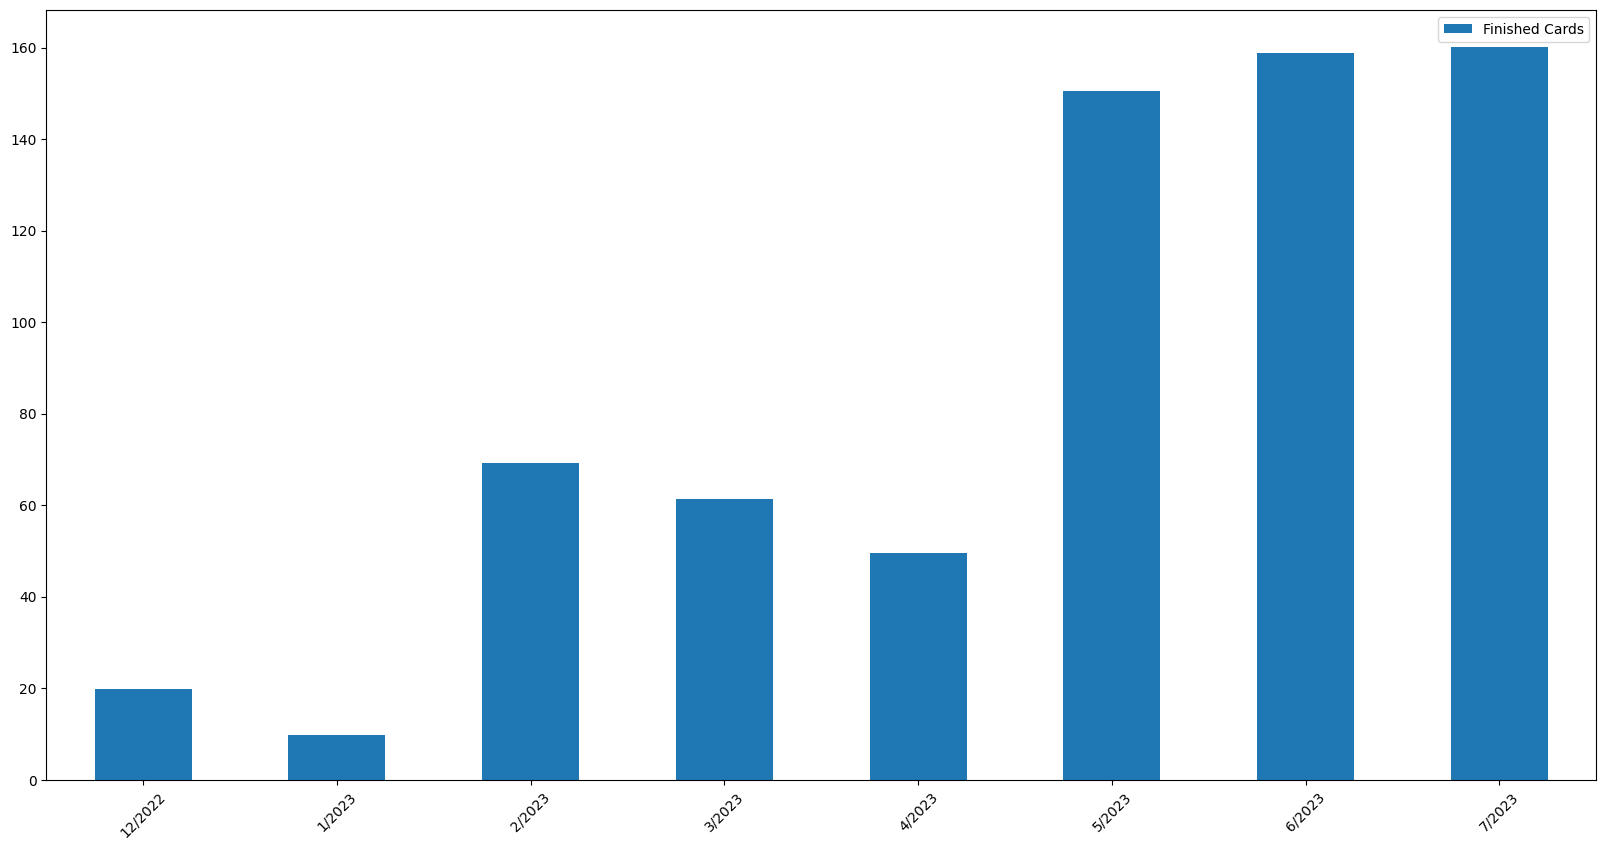

In [152]:
plot(score_per_card = lambda c: get_score(c, default=mean_score))

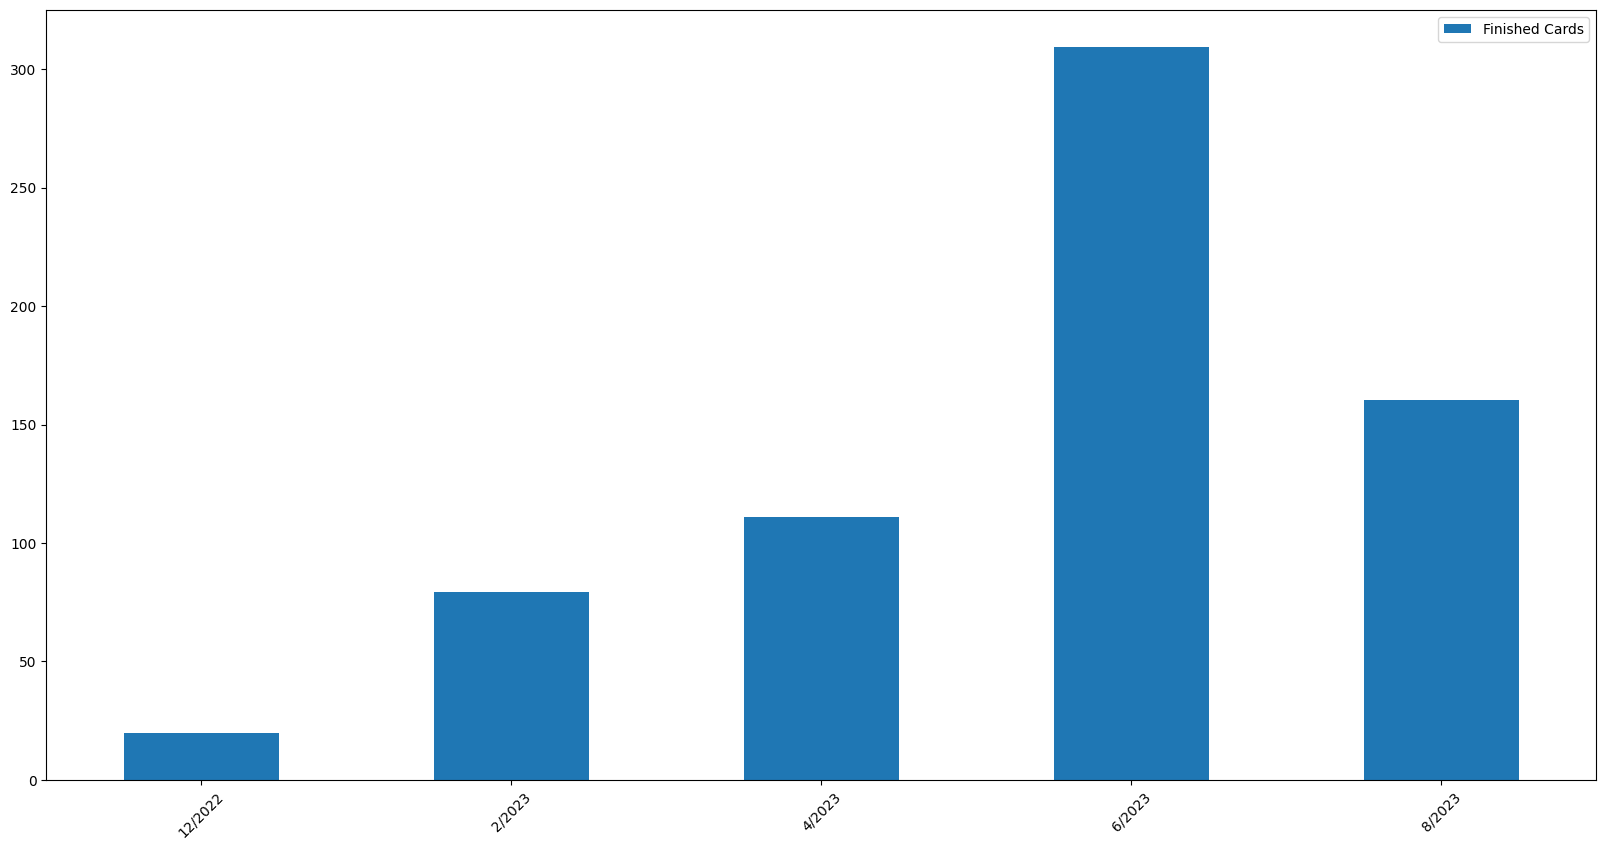

In [153]:
plot(resample_time="2M", score_per_card = lambda c: get_score(c, default=mean_score))

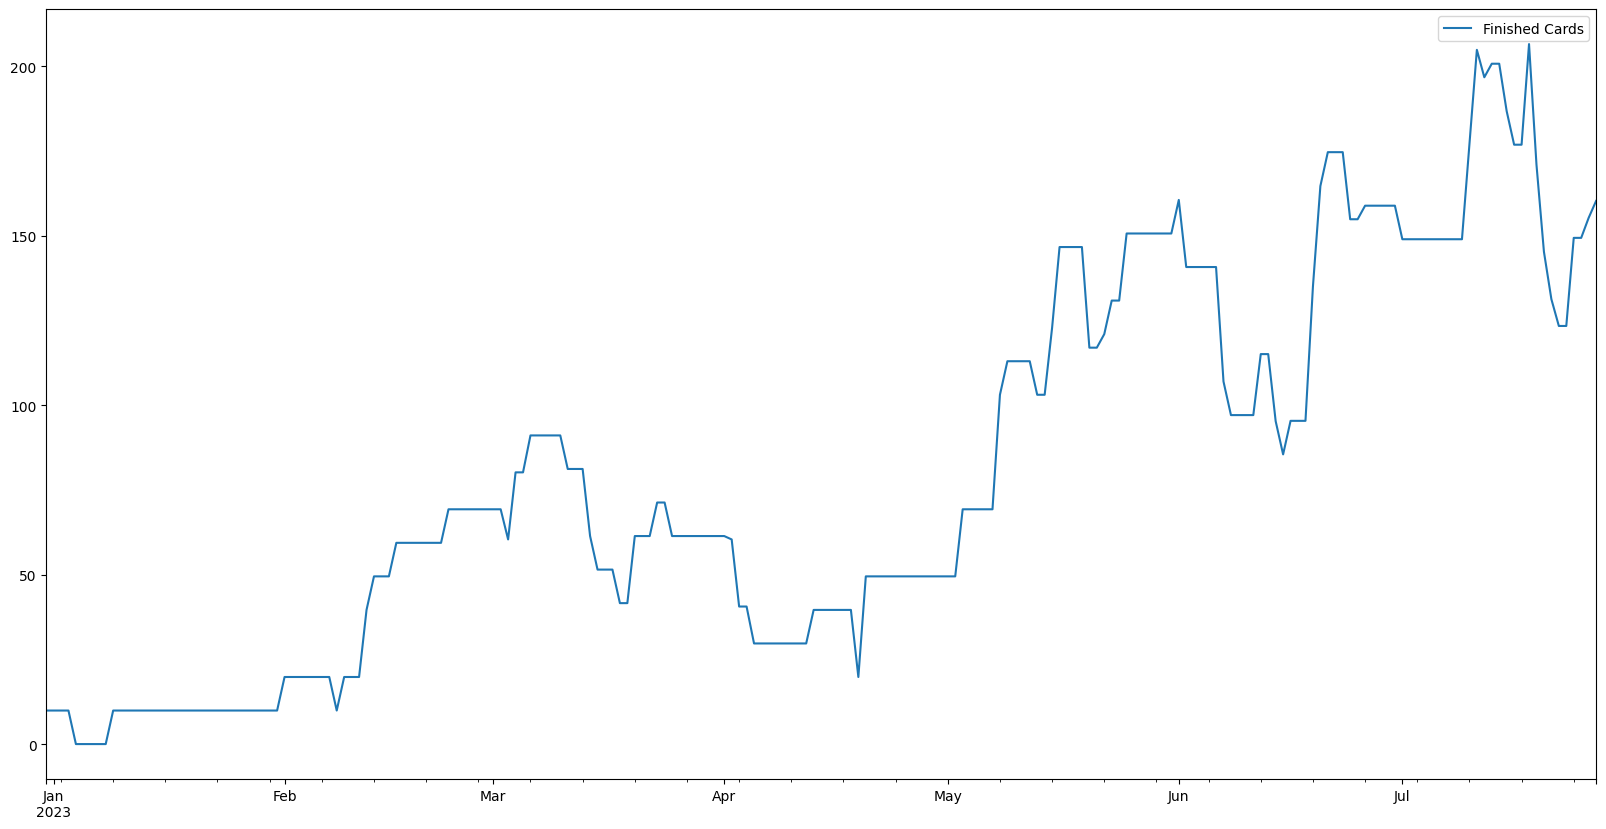

In [154]:
plot_rolling(days=30, score_per_card = lambda c: get_score(c, default=mean_score))

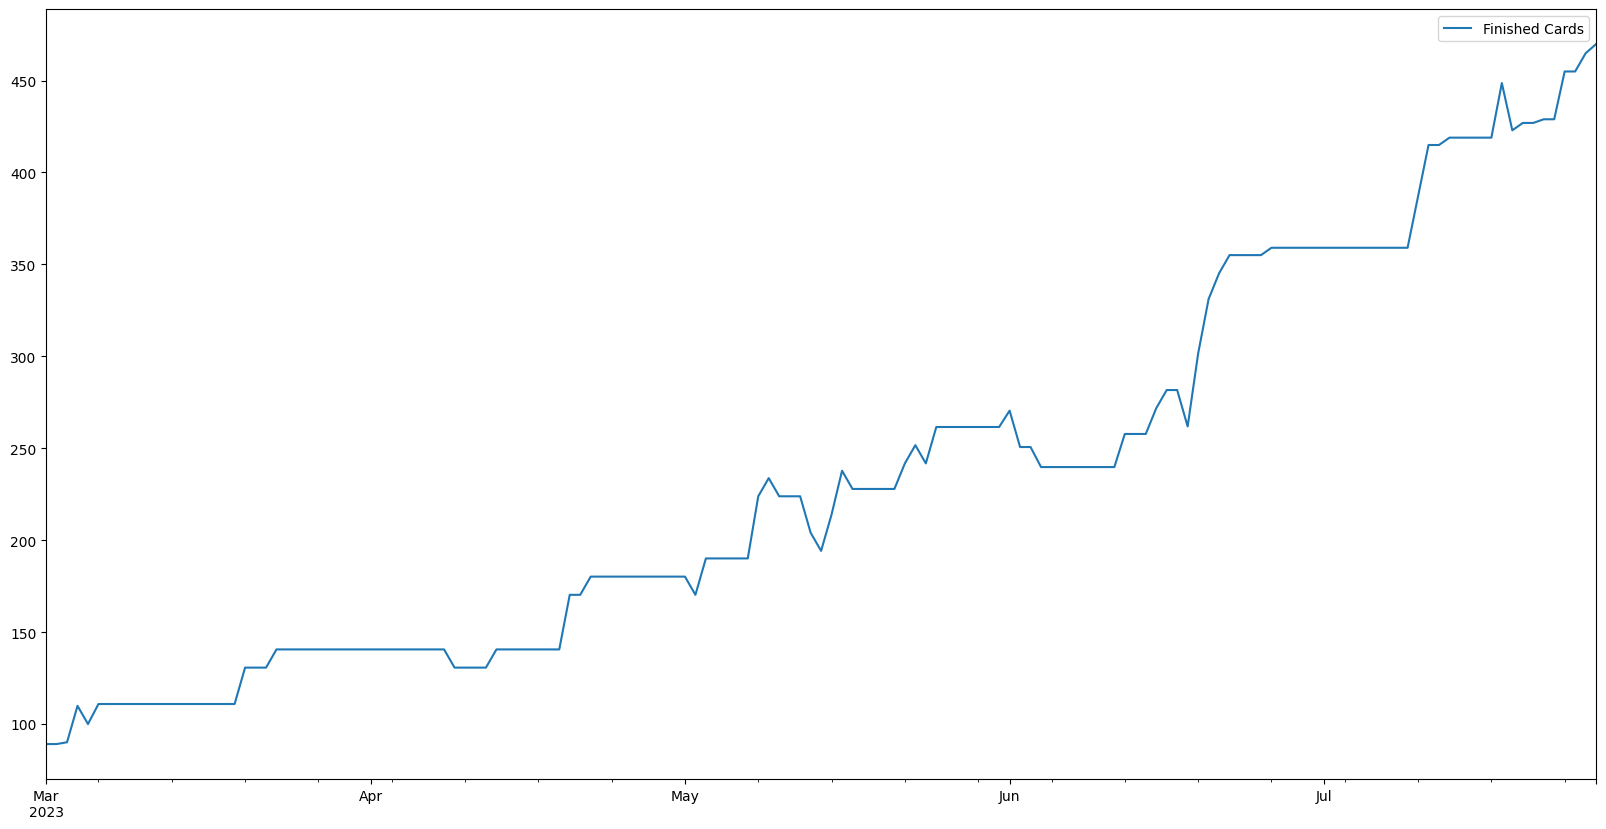

In [155]:
plot_rolling(days=90, score_per_card = lambda c: get_score(c, default=mean_score))

# Mit score (score = max geschätzte Arbeitszeit)

In [160]:
def get_score_max(card, default=None):
    for label in card["labels"]:
        if label["name"] == "Mini-Feature":
            return 1
        elif label["name"] == "S":
            return 4
        elif label["name"] == "M":
            return 30
        elif label["name"] == "L":
            return 60
    return default

all_scores = [get_score_max(card) for card in cards]
actual_scores = [s for s in all_scores if s != None]
mean_score_max = sum(actual_scores) / len(actual_scores)

print(f"Mean score: {mean_score_max}")

Mean score: 19.318840579710145


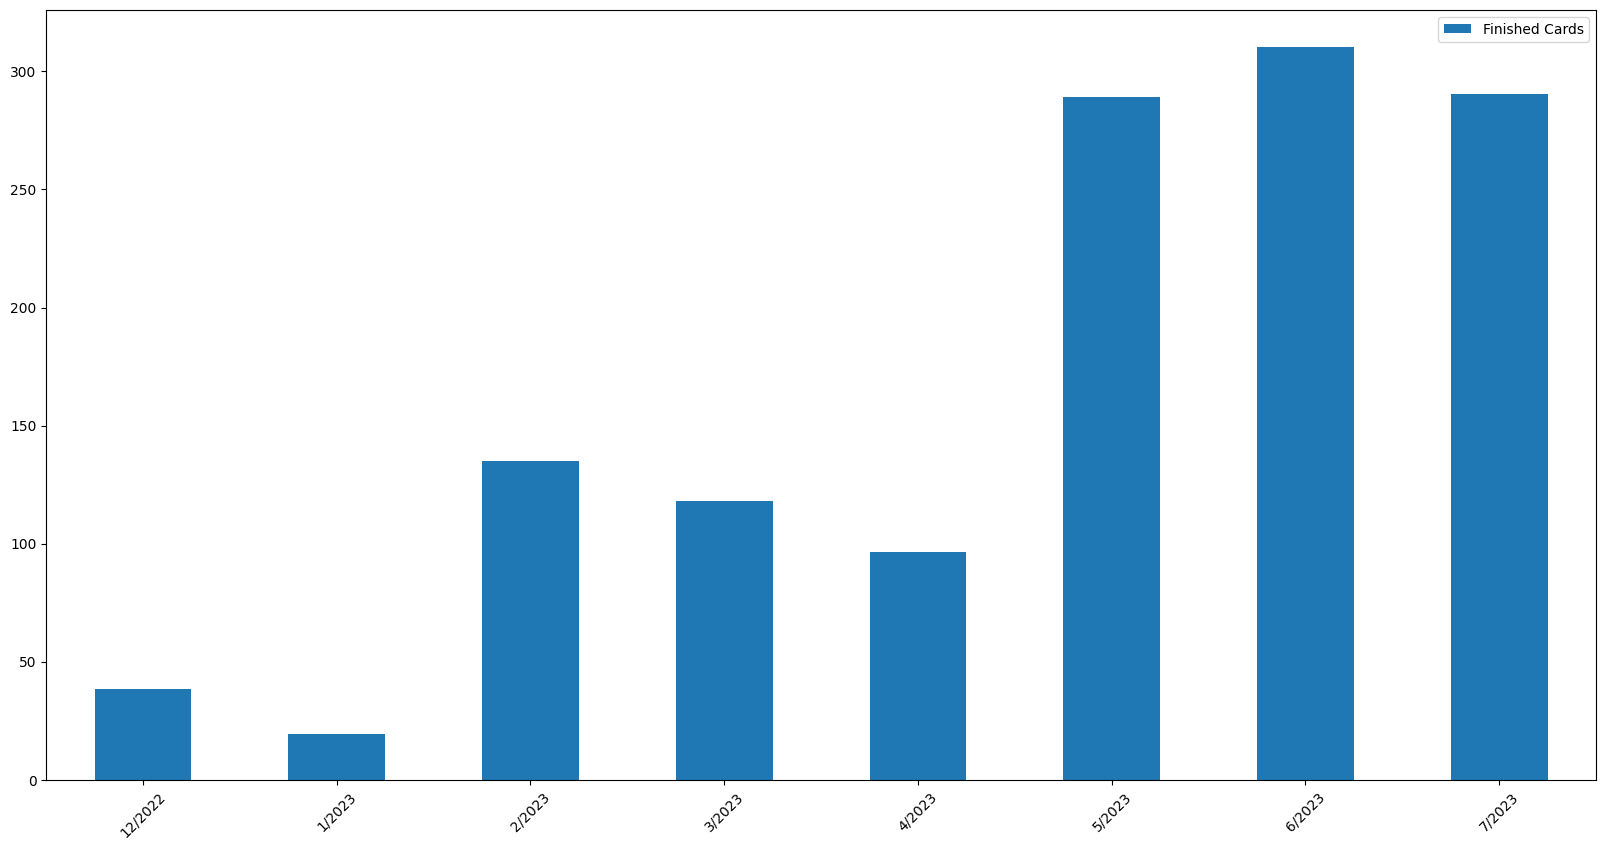

In [161]:
plot(score_per_card = lambda c: get_score_max(c, default=mean_score_max))

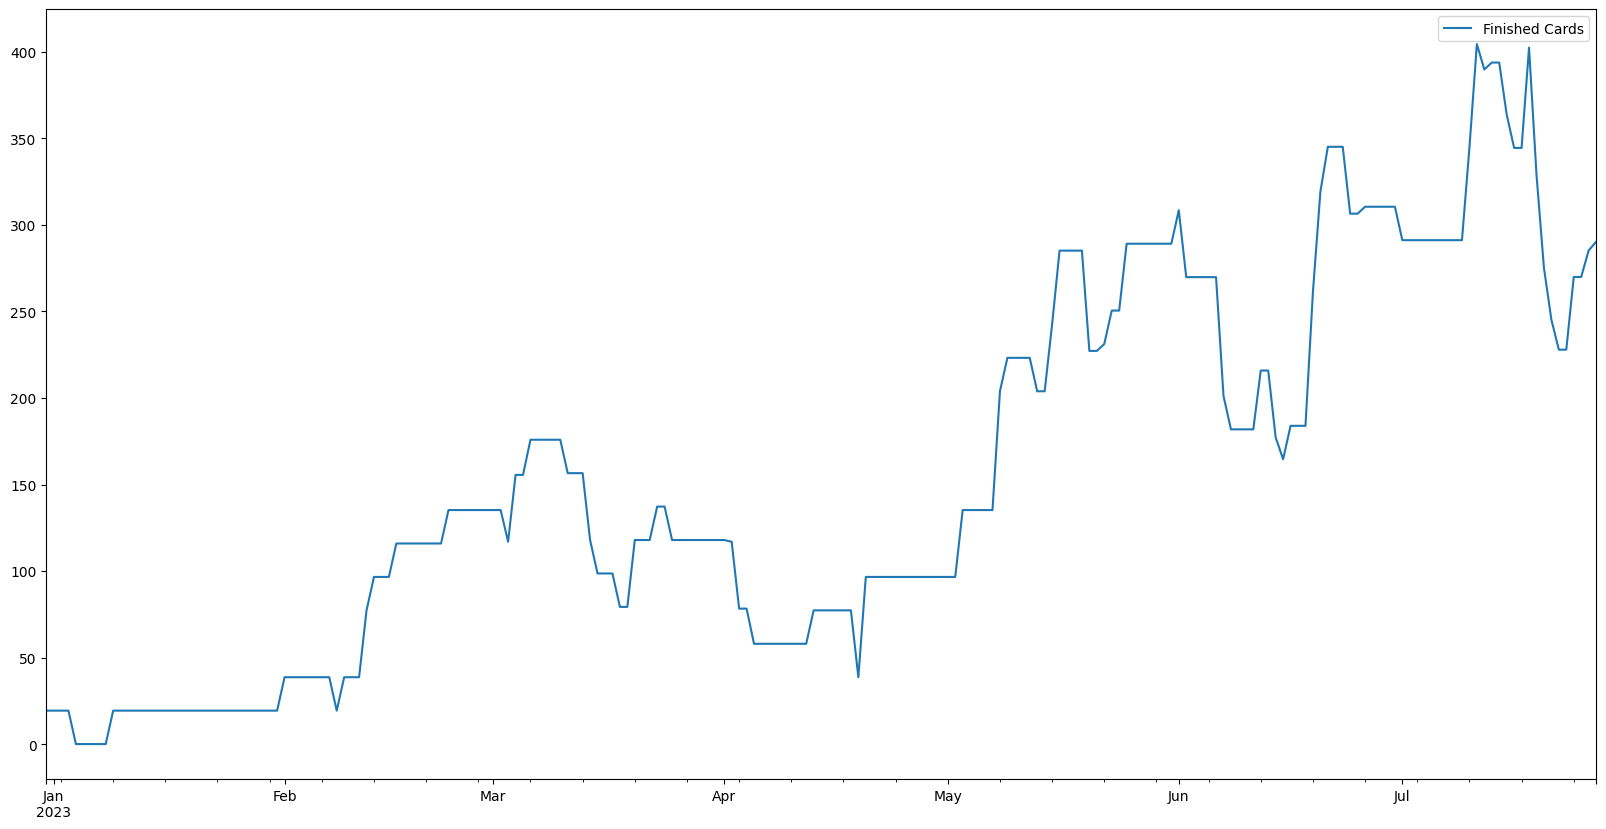

In [163]:
plot_rolling(days=30, score_per_card = lambda c: get_score_max(c, default=mean_score_max))

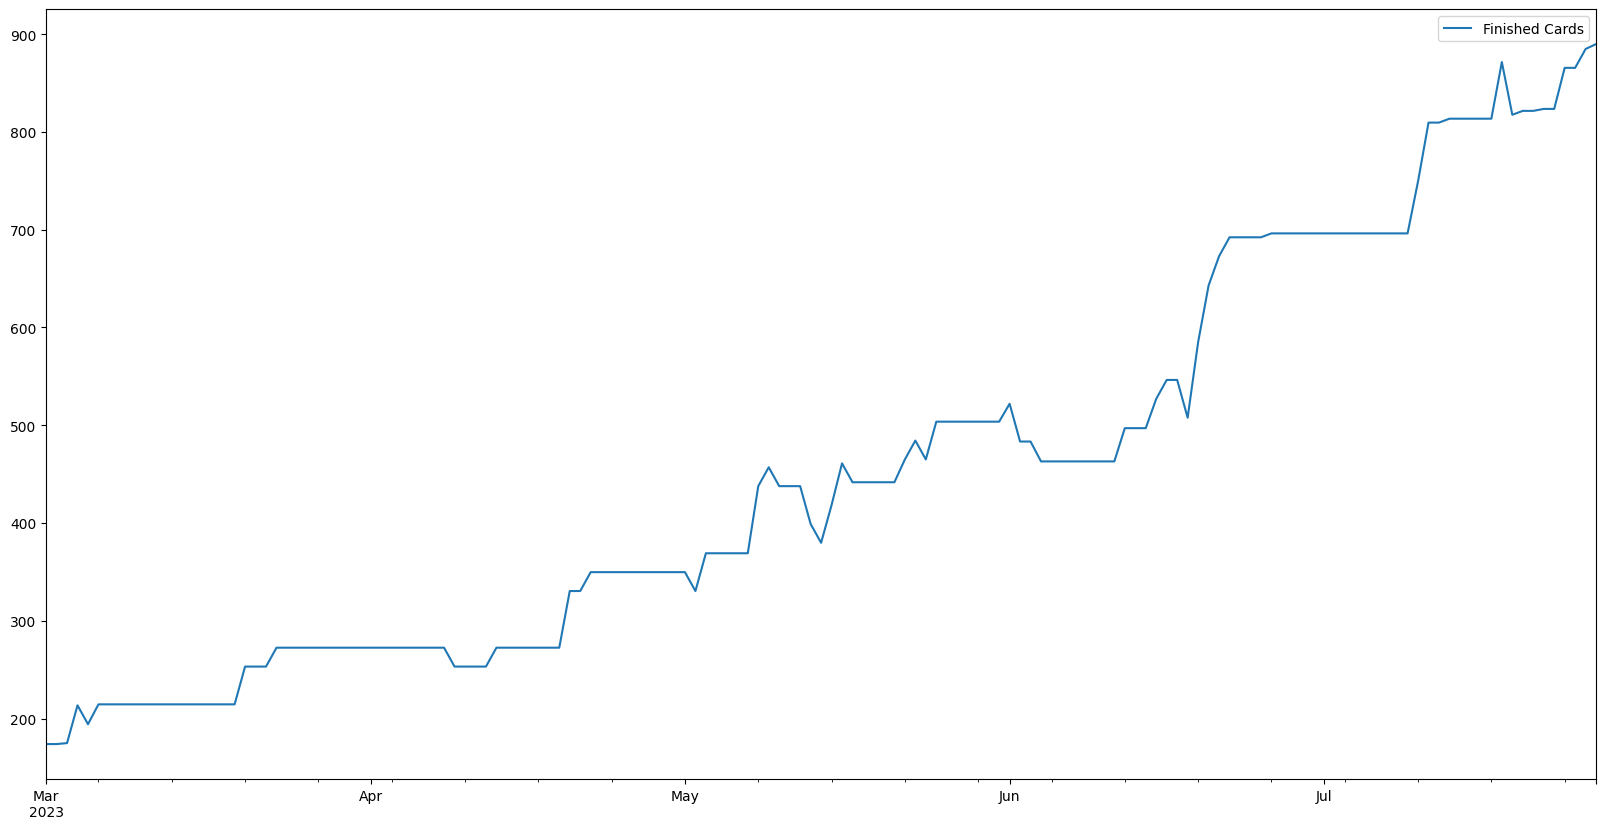

In [164]:
plot_rolling(days=90, score_per_card = lambda c: get_score_max(c, default=mean_score_max))

# Auswertung der Zeiten in den jeweiligen Spalten

In [196]:
import pandas as pd

from datetime import timezone, datetime

def get_time_in_lists(card):
    result = dict((l["id"], pd.Timedelta(0)) for l in lists)
    
    last_time = pd.to_datetime(card["actions"][0]["date"]) 
    
    for action in card["actions"][1:]:
        diff = pd.to_datetime(action["date"]) - last_time
        
        if action["data"]["listBefore"]["id"] in result:
            result[action["data"]["listBefore"]["id"]] += diff
        
        last_time = pd.to_datetime(action["date"])
    
    result[card["idList"]] += pd.to_datetime(datetime.now(timezone.utc))-last_time
    
    return result

get_time_in_lists(cards[200])

{'63bc34d346143f025ffe3152': Timedelta('0 days 00:00:00'),
 '6374b6c8d908a5001de2fa7b': Timedelta('0 days 00:00:00'),
 '6374b6c8d908a5001de2fa7c': Timedelta('2 days 04:47:08.697000'),
 '6374b70b76ae9a0265bb679b': Timedelta('4 days 15:25:13.209000'),
 '6374b723ad21d7062366f9b6': Timedelta('0 days 00:00:00'),
 '641838c6ee62b9f7a7fa8ac2': Timedelta('0 days 00:00:00'),
 '6374b72bcbb33c0681d4b99b': Timedelta('166 days 08:18:48.206814')}

In [241]:
from IPython.display import display, HTML

def print_card(card):
    html = '<div style="padding: 1em; border: 3px black solid; border-radius: 1em; background: #f2f2f2">'
    
    if len(card["labels"]) > 0:
        html += '<div>'
        for label in card["labels"]:
            html += f'<span style="display: inline-block; border: 1px black solid; padding: 0.25em; border-radius: 0.125em; margin-right: 1em; background: #e0e0e0">{label["name"]}</span>'
        html += '</div>'
    
    html += f'<h3><a href="{card["url"]}">{card["name"]}</a></h3>'
    
    time_in_lists = get_time_in_lists(card)
    
    html += "<ul>"
    for list_name in ["Entwicklung", "Feedback / Blocked", "Testen"]:
        t = prettyprint_timedelta(time_in_lists[list_name2list_id[list_name]])
        html += f'<li>{list_name}: {t}</li>'
    
    t = prettyprint_timedelta(time_in_lists[list_name2list_id["Entwicklung"]] + time_in_lists[list_name2list_id["Testen"]])
    html += f'<li><b>Enticklung + Testen: {t}</b></li>'
    
    t = prettyprint_timedelta(time_in_lists[list_name2list_id["Entwicklung"]] + time_in_lists[list_name2list_id["Testen"]] + time_in_lists[list_name2list_id["Feedback / Blocked"]])
    html += f'<li>Gesamt: {t}</li>'
    html += "</ul>"
    
    html += '</div>'
    
    display(HTML(html))
    
def prettyprint_timedelta(timedelta_value):
    return f"{timedelta_value.days} days, {timedelta_value.seconds // 3600} hours, {timedelta_value.seconds // 60 % 60} minutes, {timedelta_value.seconds % 60} seconds"
    
print_card(cards[146])

In [242]:
from IPython.display import display, Markdown

for list_name in ["Entwicklung", "Feedback / Blocked", "Testen"]:
    display(Markdown(f'## Aktuelle Karten in "{list_name}"'))
    current_cards = [card for card in cards if card["idList"] == list_name2list_id[list_name] and not card["closed"]]
    
    for c in current_cards:
        print_card(c)

## Aktuelle Karten in "Entwicklung"

## Aktuelle Karten in "Feedback / Blocked"

## Aktuelle Karten in "Testen"

# Abgeschlossene Karten pro Monat

In [243]:
finished_cards = [card for card in cards if card["idList"] == list_name2list_id["Veröffentlicht (kann genutzt werden)"]]
finished_cards = sorted(finished_cards, key=get_last_move_date, reverse=True)
grouped_cards = dict()

for card in finished_cards:
    finished_date = pd.to_datetime(get_last_move_date(card))
    
    key = f"{finished_date.month}/{finished_date.year}"
    
    if key not in grouped_cards:
        grouped_cards[key] = []
    
    grouped_cards[key].append(card)

for name, cards_of_this_month in grouped_cards.items():
    display(Markdown(f"## {name}"))
    
    for card in cards_of_this_month:
        print_card(card)

## 7/2023

## 6/2023

## 5/2023

## 4/2023

## 3/2023

## 2/2023

## 1/2023

## 12/2022